# CS6140 Assignment 4: Unsupervised Learning FMA data Part 1
- Student: Sukhrobbek Ilyosbekov

**Table of Contents**

1. [Dataset Overview](#1)
2. [Describing Features in features.csv](#2)
3. [Describing Metadata in tracks.csv](#3)
4. [Data Integration Plan](#4)
5. [Genre Frequency Distribution](#5)



## Setup
In order to run this notebook, the following libraries should be installed:
- pandas
- matplotlib
- seaborn

These libraries can be installed using the following command:
```bash
pip install pandas matplotlib seaborn
```

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_data_path(relative_path: str) -> str:
    """
    Get the absolute path to a file in the `dataset` directory.

    Args:
        relative_path: The path to the file relative to the `dataset` directory including the file name.

    Returns:
        The full path to the file in the `dataset` directory.

    Examples:
        >>> get_data_path("assignment1/boston_listings.csv")
        "C:/Users/username/assignments/dataset/assignment1/boston_listings.csv"
    """
    return os.path.abspath(os.path.join("../../dataset", relative_path))

## 1. Dataset Overview <a id="1"></a>

The **Free Music Archive (FMA) dataset** is a comprehensive collection designed to support research in music information retrieval (MIR), machine learning, and data analysis. It offers a large-scale, open dataset encompassing audio features and extensive metadata for a diverse array of music tracks.

### Purpose

The primary goal of the FMA dataset is to facilitate the development and evaluation of algorithms in MIR tasks, such as genre classification, recommendation systems, and music analysis. By providing a rich and diverse dataset, it enables researchers to explore and model musical properties and trends effectively.

### Data Composition

The FMA dataset comprises several key components:

- **Audio Features**: Pre-extracted audio features for each track, which include:
  - **Timbral Features**: Such as MFCCs (Mel-Frequency Cepstral Coefficients), zero-crossing rate, and spectral centroid.
  - **Rhythmic Features**: Including tempo and beat-related descriptors.
  - **Spectral Features**: Such as chroma frequencies and spectral contrast.
  - **Tonality Features**: Key and mode estimations.

- **Metadata**: Extensive information about each track, provided in structured CSV files:
  - **Track Metadata**: Track ID, title, duration, and associated tags.
  - **Artist Metadata**: Artist name, location, and related social links.
  - **Album Metadata**: Album title, release date, and associated tracks.
  - **Genre Information**: Hierarchical genre annotations allowing for multi-label classification and exploration of genre relationships.
  - **Licensing Information**: Details about the Creative Commons licenses under which the tracks are released.

### Dataset Structure

The dataset is organized to facilitate ease of use and accessibility:

- **CSV Files**: Metadata and features are provided in CSV format.

- **Hierarchical Genre Taxonomy**: Genres are organized hierarchically, allowing to work with coarse or fine-grained genre distinctions.

### Notable Characteristics

- **Diversity and Openness**: The dataset covers a wide spectrum of musical genres and styles from artists worldwide, all under open licenses, promoting unrestricted research and collaboration.

- **Scalability**: With over 100,000 tracks, the FMA dataset supports studies requiring large amounts of data, as well as those needing smaller, more manageable subsets.

- **Preprocessing Convenience**: The inclusion of pre-extracted features saves valuable time and computational resources, allowing to focus on higher-level analysis and model development.

### Usage Scenarios

The FMA dataset is well-suited for a variety of research applications:

- **Genre Classification**: Developing and benchmarking algorithms to classify music into genres using audio features and metadata.

- **Recommendation Systems**: Creating models that suggest music tracks to users based on musical similarity, user preferences, or contextual information.

- **Audio Feature Exploration**: Investigating the relationships between different audio features and how they contribute to the perception of music.

- **Machine Learning Research**: Applying and testing machine learning techniques, including deep learning, on a rich and complex real-world dataset.

In [18]:
# Load the datasets
tracks = pd.read_csv(get_data_path("assignment4/tracks.csv"), header=[0, 1, 2])
features = pd.read_csv(get_data_path("assignment4/features.csv"), header=[0, 1, 2, 3])

print("Shape of the track dataset:", tracks.shape)
print("Shape of the feature dataset:", features.shape)

print("Track dataset info:")
display(tracks.info())

print("Feature dataset info:")
display(features.info())

print("Summary statistics of the track dataset:")
display(tracks.describe())

print("Summary statistics of the feature dataset:")
display(features.describe())

print("First few rows of the track dataset:")
display(tracks.head())

print("First few rows of the feature dataset:")
display(features.head())

Shape of the track dataset: (106574, 53)
Shape of the feature dataset: (106574, 519)
Track dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, track_id)  106574 non-null  int64  
 1   (album, comments, Unnamed: 1_level_2)               106574 non-null  int64  
 2   (album, date_created, Unnamed: 2_level_2)           103045 non-null  object 
 3   (album, date_released, Unnamed: 3_level_2)          70294 non-null   object 
 4   (album, engineer, Unnamed: 4_level_2)               15295 non-null   object 
 5   (album, favorites, Unnamed: 5_level_2)              106574 non-null  int64  
 6   (album, id, Unnamed: 6_level_2)                     106574 non-null  int64  
 7   (album, information, Unnamed: 7_level_2) 

None

Feature dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Columns: 519 entries, ('feature', 'statistics', 'number', 'track_id') to ('zcr', 'std', '01', 'Unnamed: 518_level_3')
dtypes: float64(518), int64(1)
memory usage: 422.0 MB


None

Summary statistics of the track dataset:


Unnamed: 0_level_0              album                     \
      Unnamed: 0_level_1           comments          favorites   
                track_id Unnamed: 1_level_2 Unnamed: 5_level_2   
count      106574.000000      106574.000000      106574.000000   
mean        79442.637435           0.394946           1.286927   
std         44704.398384           2.268915           3.133035   
min             2.000000          -1.000000          -1.000000   
25%         40820.250000           0.000000           0.000000   
50%         78983.500000           0.000000           0.000000   
75%        119422.750000           0.000000           1.000000   
max        155320.000000          53.000000          61.000000   

                                                                 \
                      id            listens              tracks   
      Unnamed: 6_level_2 Unnamed: 8_level_2 Unnamed: 12_level_2   
count      106574.000000       1.065740e+05       106574.000000   
mean        12826.933914       3.212031e+04           19.721452   
std          6290.261805       1.478532e+05           39.943673   
min            -1.000000      -1.000000e+00           -1.000000   
25%          7793.000000       3.361000e+03            7.000000   
50%         13374.000000       8.982000e+03           11.000000   
75%         18203.000000       2.363500e+04           17.000000   
max         22940.000000       3.564243e+06          652.000000   

                   artist                                          \
                 comments           favorites                  id   
      Unnamed: 18_level_2 Unnamed: 20_level_2 Unnamed: 21_level_2   
count       106574.000000       106574.000000       106574.000000   
mean             1.894702           30.041915        12036.770404   
std              6.297679          100.511408         6881.420867   
min             -1.000000           -1.000000            1.000000   
25%              0.000000            1.000000         6443.000000   
50%              0.000000            5.000000        12029.500000   
75%              1.000000           16.000000        18011.000000   
max             79.000000          963.000000        24357.000000   

                                                            track  \
                 latitude           longitude            bit_rate   
      Unnamed: 22_level_2 Unnamed: 24_level_2 Unnamed: 33_level_2   
count        44544.000000        44544.000000       106574.000000   
mean            39.901626          -38.668642       263274.695048   
std             18.240860           65.237220        67623.443584   
min            -45.878760         -157.526855           -1.000000   
25%             39.271398          -79.997459       192000.000000   
50%             41.387917          -73.554431       299914.000000   
75%             48.856930            4.351710       320000.000000   
max             67.286005          175.277000       448000.000000   

                                                                   \
                 comments            duration           favorites   
      Unnamed: 34_level_2 Unnamed: 38_level_2 Unnamed: 39_level_2   
count       106574.000000       106574.000000       106574.000000   
mean             0.031621          277.849100            3.182521   
std              0.321993          305.518553           13.513820   
min              0.000000            0.000000            0.000000   
25%              0.000000          149.000000            0.000000   
50%              0.000000          216.000000            1.000000   
75%              0.000000          305.000000            3.000000   
max             37.000000        18350.000000         1482.000000   

                                                                   
                 interest             listens              number  
      Unnamed: 44_level_2 Unnamed: 47_level_2 Unnamed: 49_level_2  
count        1.065740e+05       106574.000000       10657

Summary statistics of the feature dataset:


feature        chroma_cens                                        \
          statistics           kurtosis                                         
              number                 01                 02                 03   
            track_id Unnamed: 1_level_3 Unnamed: 2_level_3 Unnamed: 3_level_3   
count  106574.000000      106574.000000      106574.000000      106574.000000   
mean    79442.637435           0.439999           0.199756           0.334683   
std     44704.398384          32.285524          11.120903           9.980692   
min         2.000000          -1.955806          -1.936607          -1.967450   
25%     40820.250000          -0.636597          -0.665684          -0.629114   
50%     78983.500000          -0.176557          -0.221131          -0.152708   
75%    119422.750000           0.485000           0.410097           0.529836   
max    155320.000000        8843.367188        2864.075195        1777.615967   

                                                                \
                                                                 
                      04                 05                 06   
      Unnamed: 4_level_3 Unnamed: 5_level_3 Unnamed: 6_level_3   
count      106574.000000      106574.000000      106574.000000   
mean            0.270263           0.294806           0.315635   
std            19.074557          15.025603          12.176182   
min            -3.000000          -1.921206          -1.923740   
25%            -0.644747          -0.656779          -0.622579   
50%            -0.191032          -0.198025          -0.152089   
75%             0.446800           0.452680           0.513112   
max          4257.045898        3188.034424        2809.779297   

                                                                ...  \
                                                                ...   
                      07                 08                 09  ...   
      Unnamed: 7_level_3 Unnamed: 8_level_3 Unnamed: 9_level_3  ...   
count      106574.000000      106574.000000      106574.000000  ...   
mean            0.273511           0.334927           0.201939  ...   
std            16.975991          15.486402           7.364308  ...   
min            -1.935382          -3.000000          -3.000000  ...   
25%            -0.646798          -0.635741          -0.667799  ...   
50%            -0.187959          -0.161478          -0.214547  ...   
75%             0.472161           0.525814           0.432480  ...   
max          4281.090820        3869.482178        1217.209473  ...   

                   tonnetz                                            \
                       std                                             
                        04                   05                   06   
      Unnamed: 509_level_3 Unnamed: 510_level_3 Unnamed: 511_level_3   
count        106574.000000        106574.000000        106574.000000   
mean              0.098667             0.021569             0.021880   
std               0.037101             0.006076             0.006125   
min               0.005681             0.000087             0.000368   
25%               0.071240             0.017226             0.017542   
50%               0.093500             0.020636             0.020964   
75%               0.121007             0.024990             0.025252   
max               0.332470             0.092869             0.116128   

                       zcr                                            \
                  kurtosis                  max                 mean   
                        01                   01                   01   
      Unnamed: 512_level_3 Unnamed: 513_level_3 Unnamed: 514_level_3   
count        106574.000000        106574.000000        106574.000000   
mean             29.464638             0.381368             0.052755   
std              88.975395             0.183414             0.032634   
min              -1.96753

First few rows of the track dataset:


Unnamed: 0_level_0              album                       \
  Unnamed: 0_level_1           comments         date_created   
            track_id Unnamed: 1_level_2   Unnamed: 2_level_2   
0                  2                  0  2008-11-26 01:44:45   
1                  3                  0  2008-11-26 01:44:45   
2                  5                  0  2008-11-26 01:44:45   
3                 10                  0  2008-11-26 01:45:08   
4                 20                  0  2008-11-26 01:45:05   

                                                              \
         date_released           engineer          favorites   
    Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 5_level_2   
0  2009-01-05 00:00:00                NaN                  4   
1  2009-01-05 00:00:00                NaN                  4   
2  2009-01-05 00:00:00                NaN                  4   
3  2008-02-06 00:00:00                NaN                  4   
4  2009-01-06 00:00:00                NaN                  2   

                                                                 \
                  id                                information   
  Unnamed: 6_level_2                         Unnamed: 7_level_2   
0                  1                                    <p></p>   
1                  1                                    <p></p>   
2                  1                                    <p></p>   
3                  6                                        NaN   
4                  4  <p> "spiritual songs" from Nicky Cook</p>   

                                         ...               track  \
             listens           producer  ...         information   
  Unnamed: 8_level_2 Unnamed: 9_level_2  ... Unnamed: 43_level_2   
0               6073                NaN  ...                 NaN   
1               6073                NaN  ...                 NaN   
2               6073                NaN  ...                 NaN   
3              47632                NaN  ...                 NaN   
4               2710                NaN  ...                 NaN   

                                           \
             interest       language_code   
  Unnamed: 44_level_2 Unnamed: 45_level_2   
0                4656                  en   
1                1470                  en   
2                1933                  en   
3               54881                  en   
4                 978                  en   

                                                                          \
                                             license             listens   
                                 Unnamed: 46_level_2 Unnamed: 47_level_2   
0  Attribution-NonCommercial-ShareAlike 3.0 Inter...                1293   
1  Attribution-NonCommercial-ShareAlike 3.0 Inter...                 514   
2  Attribution-NonCommercial-ShareAlike 3.0 Inter...                1151   
3  Attribution-NonCommercial-NoDerivatives (aka M...               50135   
4  Attribution-NonCommercial-NoDerivatives (aka M...                 361   

                                                               \
             lyricist              number           publisher   
  Unnamed: 48_level_2 Unnamed: 49_level_2 Unnamed: 50_level_2   
0                 NaN                   3                 NaN   
1                 NaN                   4                 NaN   
2                 NaN                   6                 NaN   
3                 NaN                   1                 NaN   
4                 NaN                   3                 NaN   

                                           
                 tags               title  
  Unnamed: 51_level_2 Unnamed: 52_level_2  
0                  []                Food  
1                  []        Electric Ave  
2                  []          This World  
3                  []             Freeway  
4                  []     Spiritual Level  

[5 rows x 53 columns]

First few rows of the feature dataset:


feature        chroma_cens                                        \
  statistics           kurtosis                                         
      number                 01                 02                 03   
    track_id Unnamed: 1_level_3 Unnamed: 2_level_3 Unnamed: 3_level_3   
0          2           7.180653           5.230309           0.249321   
1          3           1.888963           0.760539           0.345297   
2          5           0.527563          -0.077654          -0.279610   
3         10           3.702245          -0.291193           2.196742   
4         20          -0.193837          -0.198527           0.201546   

                                                                               \
                                                                                
                  04                 05                 06                 07   
  Unnamed: 4_level_3 Unnamed: 5_level_3 Unnamed: 6_level_3 Unnamed: 7_level_3   
0           1.347620           1.482478           0.531371           1.481593   
1           2.295201           1.654031           0.067592           1.366848   
2           0.685883           1.937570           0.880839          -0.923192   
3          -0.234449           1.367364           0.998411           1.770694   
4           0.258556           0.775204           0.084794          -0.289294   

                                         ...              tonnetz  \
                                         ...                  std   
                  08                 09  ...                   04   
  Unnamed: 8_level_3 Unnamed: 9_level_3  ... Unnamed: 509_level_3   
0           2.691455           0.866868  ...             0.054125   
1           1.054094           0.108103  ...             0.063831   
2          -0.927232           0.666617  ...             0.040730   
3           1.604566           0.521217  ...             0.074358   
4          -0.816410           0.043851  ...             0.095003   

                                                             zcr  \
                                                        kurtosis   
                    05                   06                   01   
  Unnamed: 510_level_3 Unnamed: 511_level_3 Unnamed: 512_level_3   
0             0.012226             0.012111             5.758890   
1             0.014212             0.017740             2.824694   
2             0.012691             0.014759             6.808415   
3             0.017952             0.013921            21.434212   
4             0.022492             0.021355            16.669037   

                                                                  \
                   max                 mean               median   
                    01                   01                   01   
  Unnamed: 513_level_3 Unnamed: 514_level_3 Unnamed: 515_level_3   
0             0.459473             0.085629             0.071289   
1             0.466309             0.084578             0.063965   
2             0.375000             0.053114             0.041504   
3             0.452148             0.077515             0.071777   
4             0.469727             0.047225             0.040039   

                                                                  
                   min                 skew                  std  
                    01                   01                   01  
  Unnamed: 516_level_3 Unnamed: 517_level_3 Unnamed: 518_level_3  
0             0.000000             2.089872             0.061448  
1             0.000000             1.716724             0.069330  
2             0.000000             2.193303             0.044861  
3             0.000000             3.542325             0.040800  
4             0.000977             3.189831             0.030993  

[5 rows x 519 columns]

## 2. Describing Features in features.csv <a id="2"></a>

First, standartize column names by flattening the multi-level column names and removing postfixes such as 'Unnamed: 1_level_3', 'Unnamed: 2_level_3', etc.

In [4]:
features_df = features.copy()

# Flatten the multi-row header to create a single-level column index for easier manipulation
features_df.columns = ["_".join(filter(None, col)).strip() for col in features_df.columns.values]

# Remove '_Unnamed: 1_level_3', '_Unnamed: 2_level_3' and so on using regex
features_df.columns = features_df.columns.str.replace(r"_Unnamed: \d+_level_\d+$", "", regex=True)

# Rename the column feature_statistics_number_track_id to track_id
features_df.rename(columns={"feature_statistics_number_track_id": "track_id"}, inplace=True)

print("Features dataset info:")
display(features_df.info())

print("First few rows of the features dataset:")
display(features_df.head())

Features dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Columns: 519 entries, track_id to zcr_std_01
dtypes: float64(518), int64(1)
memory usage: 422.0 MB


None

First few rows of the features dataset:


,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


### Domain Extraction

There are total 519 features in the dataset. These features are categorized into the following domains:
- **chroma_cens**: Chroma CENS (Chroma Energy Normalized Statistics) represents pitch class profiles, capturing harmonic and melodic information.
- **chroma_cqt**: Chroma CQT (Chroma Constant-Q Transform) represents a chromagram with a constant-Q transform, capturing pitch and harmony in audio data..
- **chroma_stft**: Chroma STFT (Short-Time Fourier Transform) represents a chromagram computed from STFT, showing pitch class energy over time.
- **mfcc**: MFCC (Mel-Frequency Cepstral Coefficients) represents spectral properties of audio, useful for speech and music analysis.
- **spectral_bandwidth**: Spectral Bandwidth represents the range of frequencies in the audio signal, capturing tonal and timbral qualities.
- **spectral_centroid**: Spectral Centroid represents the 'center of mass' of the spectrum, indicating the brightness of a sound.
- **spectral_contrast**: Spectral Contrast represents the difference in amplitude between peaks and valleys in the spectrum, reflecting texture and timbre.
- **spectral_rolloff**: Spectral Rolloff represents the frequency below which a specified percentage of the total spectral energy lies, capturing spectral shape.
- **tonnetz**: Tonnetz (Tonal Network) represents the harmonic and tonal relations in audio data, capturing chordal and key characteristics.
- **zcr**: ZCR (Zero-Crossing Rate) represents the rate at which the audio signal changes sign, indicating noisiness or percussiveness.

Regex pattern for domain names: chroma_cens|chroma_cqt|chroma_stft|mfcc|spectral_bandwidth|spectral_centroid|spectral_contrast|spectral_rolloff|tonnetz|zcr
Summary of domain descriptions and feature counts:


,Domain,Description,Feature Count
0,mfcc,MFCC (Mel-Frequency Cepstral Coefficients) rep...,140
1,chroma_cens,Chroma CENS (Chroma Energy Normalized Statisti...,84
2,chroma_cqt,Chroma CQT (Constant-Q Chromagram) represents ...,84
3,chroma_stft,Chroma STFT (Short-Time Fourier Transform) rep...,84
4,spectral_contrast,Spectral Contrast represents the difference in...,49
5,tonnetz,Tonnetz (Tonal Network) represents the harmoni...,42
6,spectral_bandwidth,Spectral Bandwidth represents the range of fre...,7
7,spectral_centroid,Spectral Centroid represents the 'center of ma...,7
8,spectral_rolloff,Spectral Rolloff represents the frequency belo...,7
9,zcr,ZCR (Zero-Crossing Rate) represents the rate a...,7


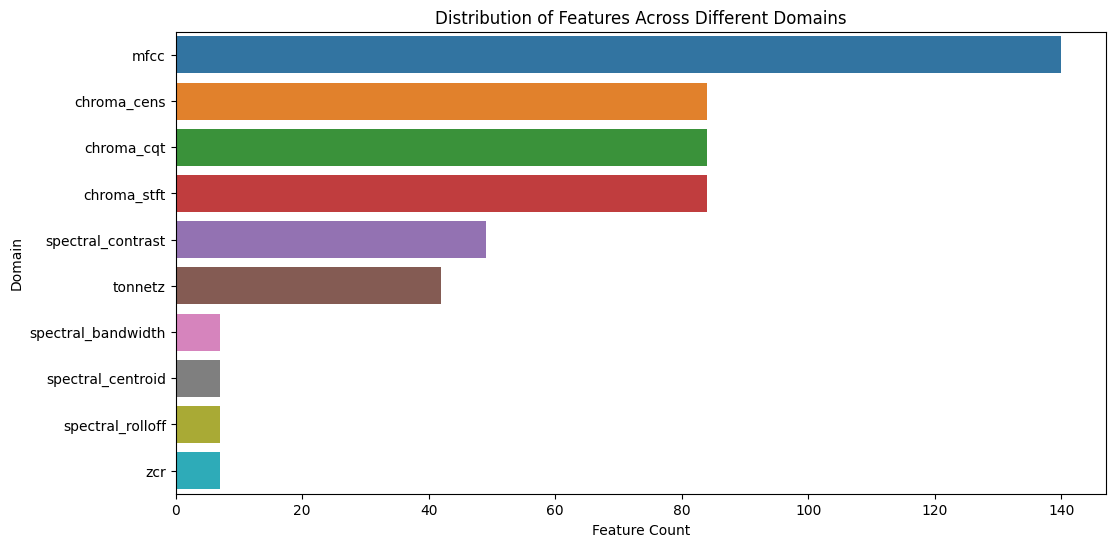

In [5]:
# Initialize a dictionary for domain descriptions
domain_descriptions = {
    "chroma_cens": "Chroma CENS (Chroma Energy Normalized Statistics) represents pitch class profiles, capturing harmonic and melodic information.",
    "chroma_cqt": "Chroma CQT (Constant-Q Chromagram) represents a chromagram with a constant-Q transform, capturing pitch and harmony in audio data.",
    "chroma_stft": "Chroma STFT (Short-Time Fourier Transform) represents a chromagram computed from STFT, showing pitch class energy over time.",
    "mfcc": "MFCC (Mel-Frequency Cepstral Coefficients) represents spectral properties of audio, useful for speech and music analysis.",
    "spectral_bandwidth": "Spectral Bandwidth represents the range of frequencies in the audio signal, capturing tonal and timbral qualities.",
    "spectral_centroid": "Spectral Centroid represents the 'center of mass' of the spectrum, indicating the brightness of a sound.",
    "spectral_contrast": "Spectral Contrast represents the difference in amplitude between peaks and valleys in the spectrum, reflecting texture and timbre.",
    "spectral_rolloff": "Spectral Rolloff represents the frequency below which a specified percentage of the total spectral energy lies.",
    "tonnetz": "Tonnetz (Tonal Network) represents the harmonic and tonal relations in audio data, capturing chordal and key characteristics.",
    "zcr": "ZCR (Zero-Crossing Rate) represents the rate at which the audio signal changes sign, indicating noisiness or percussiveness."
}

# Define a regex pattern to match domain names based on domain_descriptions dictionary keys
domain_pattern = "|".join(domain_descriptions.keys())
print("Regex pattern for domain names:", domain_pattern)

# Extract domains from the flattened column headers that match any of the domain names in domain_descriptions
domains = features_df.columns.str.extract(f"({domain_pattern})")[0].value_counts()

# Generate a summary of domain descriptions and feature counts
domain_summary = pd.DataFrame({
    "Domain": domains.index,
    "Description": [domain_descriptions[domain] for domain in domains.index],
    "Feature Count": domains.values
})

print("Summary of domain descriptions and feature counts:")
display(domain_summary)

# Plot the distribution of features across different domains
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Count", y="Domain", data=domain_summary, hue="Domain", legend=False)
plt.title("Distribution of Features Across Different Domains")
plt.xlabel("Feature Count")
plt.ylabel("Domain")
plt.show()

### Total number of features within each domain

,Domain Group,Feature Count
0,chroma,252
1,spectral,70
2,mfcc,140
3,tonnetz,42
4,zcr,7


Text(0, 0.5, 'Domain Group')

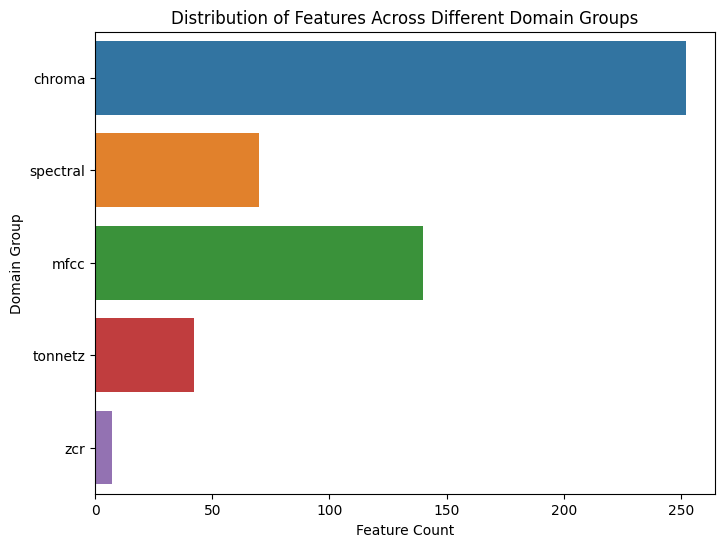

In [6]:
domains_grouped = {
    "chroma": ["chroma_cens", "chroma_cqt", "chroma_stft"],
    "spectral": ["spectral_bandwidth", "spectral_centroid", "spectral_contrast", "spectral_rolloff"],
    "mfcc": ["mfcc"],
    "tonnetz": ["tonnetz"],
    "zcr": ["zcr"]
}

# Calculate the total number of features in each domain group
domain_group_counts = {group: sum([domains[domain] for domain in domains_grouped[group]]) for group in domains_grouped}

# Generate a summary of domain group descriptions and feature counts
domain_group_summary = pd.DataFrame({
    "Domain Group": domain_group_counts.keys(),
    "Feature Count": domain_group_counts.values()
})

display(domain_group_summary)

# Plot the distribution of features across different domain groups
plt.figure(figsize=(8, 6))
sns.barplot(x="Feature Count", y="Domain Group", data=domain_group_summary, hue="Domain Group", legend=False)
plt.title("Distribution of Features Across Different Domain Groups")
plt.xlabel("Feature Count")
plt.ylabel("Domain Group")

## 3. Describing Metadata in tracks.csv <a id="3"></a>
Standartize column names by flattening the multi-level column names and removing postfixes such as 'Unnamed: 1_level_3', 'Unnamed: 2_level_3', etc.

In [7]:
tracks_df = tracks.copy()

# Flatten the multi-row header to create a single-level column index for easier manipulation
tracks_df.columns = ["_".join(filter(None, col)).strip() for col in tracks_df.columns.values]

# Remove '_Unnamed: 1_level_3', '_Unnamed: 2_level_3' and so on using regex
tracks_df.columns = tracks_df.columns.str.replace(r"_Unnamed: \d+_level_\d+$", "", regex=True)

# Rename the column Unnamed: 0_level_0_Unnamed: 0_level_1_track_id to track_id
tracks_df.rename(columns={"Unnamed: 0_level_0_Unnamed: 0_level_1_track_id": "track_id"}, inplace=True)

print("Tracks dataset info:")
display(tracks_df.info())

print("First few rows of the tracks dataset:")
display(tracks_df.head())

Tracks dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_id                  106574 non-null  int64  
 1   album_comments            106574 non-null  int64  
 2   album_date_created        103045 non-null  object 
 3   album_date_released       70294 non-null   object 
 4   album_engineer            15295 non-null   object 
 5   album_favorites           106574 non-null  int64  
 6   album_id                  106574 non-null  int64  
 7   album_information         83149 non-null   object 
 8   album_listens             106574 non-null  int64  
 9   album_producer            18060 non-null   object 
 10  album_tags                106574 non-null  object 
 11  album_title               105549 non-null  object 
 12  album_tracks              106574 non-null  int64  
 13  album_type             

None

First few rows of the tracks dataset:


,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


### Description of some metadata fields

- **track_title**: The title of the track or song.
- **artist_name**: The name of the artist who performed or created the track.
- **album_title**: The title of the album to which the track belongs.
- **track_genre_top**: The primary genre associated with the track, providing a high-level categorization.
- **track_duration**: The length of the track in seconds.
- **track_language_code**: The language code representing the primary language of the lyrics or vocal content in the track, if available.
- **track_date_created**: The date when the track was originally created.
- **track_listens**: Total number of times the track has been listened to, indicating its popularity.
- **track_favorites**: Total number of times the track has been marked as a favorite, which can be an indicator of user preference.
- **artist_location**: The location of the artist or group, generally including city and country information.
- **artist_latitude**: The latitude of the artist’s location, useful for geographical analyses of music trends.
- **artist_longitude**: The longitude of the artist’s location.
- **album_date_released**: The date when the album containing the track was officially released.
- **album_type**: The type of album, such as "studio" or "live," indicating the format and context of the recording.
- **track_license**: The license type under which the track is released, defining usage rights and restrictions.
- **track_interest**: A calculated score or metric representing user interest in the track, based on engagement metrics like listens and favorites.

## 4. Data Integration Plan <a id="4"></a>

To facilitate efficient future analysis, the datasets `features.csv` and `tracks.csv` need to be joined in a meaningful and optimized way. The following steps outline the integration strategy:

#### **1. Unique Identifiers**
Both datasets include a unique identifier the column `track_id` is used to identify each audio track. Both `features.csv` and `tracks.csv` have the same column `track_id` and it is a primary identifier. This column will serve as the key for joining the datasets.

#### **2. Join Type**
Use an **inner join** to ensure that only tracks present in both datasets are included in the integrated data. This eliminates any rows from either dataset that do not have corresponding entries in the other. This is especially important for tracks that might not have both features and metadata.

#### **3. Relevant Columns**
Select relevant columns to reduce memory usage and enhance query performance. For instance:
  - From `tracks.csv`: Include key metadata columns such as `track_id`, `track_title`, `artist_name`, `track_genre_top`, `track_duration`, `track_listens`, and `track_favorites`.
  - From `features.csv`: Include all feature columns since these are critical for audio analysis.

## 5. Genre Frequency Distribution <a id="5"></a>

Genre Frequency Table:


,Genre,Frequency
0,Rock,14182
1,Experimental,10608
2,Electronic,9372
3,Hip-Hop,3552
4,Folk,2803
5,Pop,2332
6,Instrumental,2079
7,International,1389
8,Classical,1230
9,Jazz,571


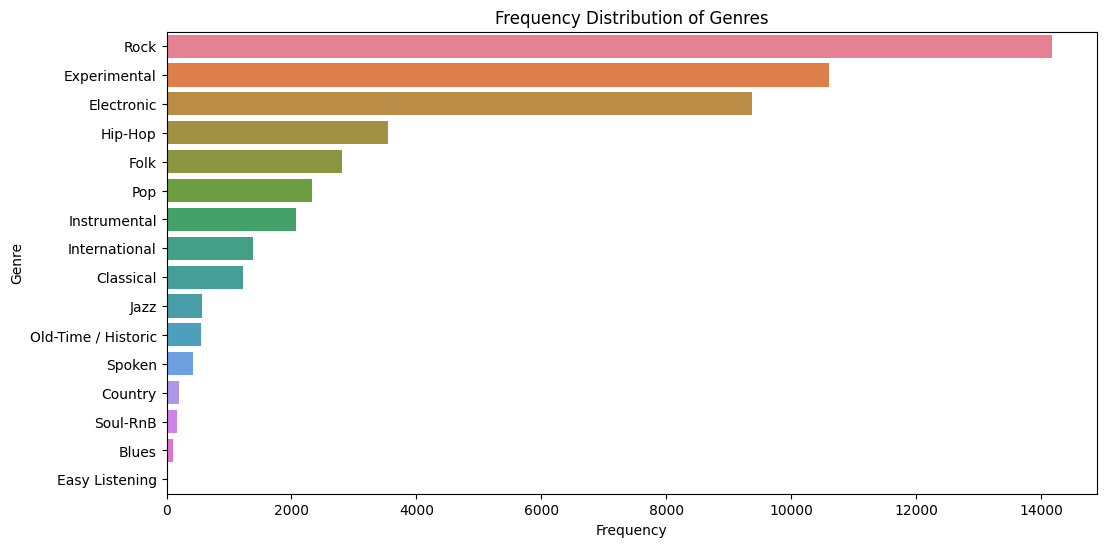

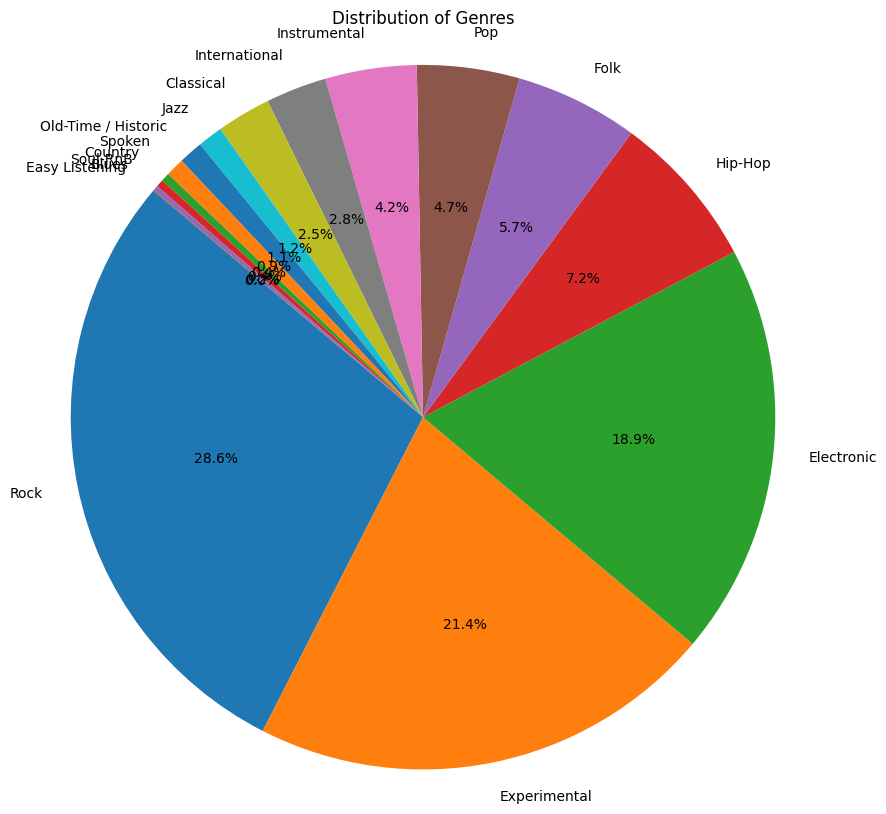

In [ ]:
# Extract the primary genre column
genres = tracks_df["track_genre_top"]

# Compute the frequency of each genre
genre_counts = genres.value_counts()

# Display genre frequency as a table
genre_table = pd.DataFrame({
    "Genre": genre_counts.index,
    "Frequency": genre_counts.values
})

print("Genre Frequency Table:")
display(genre_table)

# Plot the frequency distribution as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Frequency", y="Genre", data=genre_table, hue="Genre", legend=False)
plt.title("Frequency Distribution of Genres")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.show()

# Plot the distribution of genres using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=140) # type: ignore
plt.title("Distribution of Genres")
plt.axis("equal")
plt.show()

From the frequency distribution of genres in the `tracks.csv` dataset, we observe the following key insights:

1. **Dominant Genres**:
   - **Rock** is the most prominent genre, with 14,182 tracks, accounting for approximately 28.6% of the dataset. This indicates a high prevalence of Rock music in the collection.
   - **Experimental** and **Electronic** follow, with frequencies of 10,608 and 9,372 respectively, making up about 21.4% and 18.9% of the dataset. This suggests a significant representation of diverse and modern sounds within these categories.

2. **Mid-Range Genres**:
   - **Hip-Hop** and **Folk** are moderately represented, with frequencies of 3,552 and 2,803. This shows some diversity in the dataset, catering to these popular genres.
   - **Pop** and **Instrumental** also hold a noticeable presence with 2,332 and 2,079 tracks respectively, indicating the dataset’s breadth in catering to different audience preferences.

3. **Less Common Genres**:
   - Genres like **Jazz**, **Classical**, and **International** have frequencies below 2,000, showcasing niche segments of the dataset.
   - Rare genres such as **Old-Time / Historic**, **Spoken**, **Country**, **Soul-RnB**, **Blues**, and **Easy Listening** have relatively lower frequencies, collectively covering a small portion of the dataset.

The bar chart and pie chart provide complementary visual representations:
- The **bar chart** shows the absolute counts, making it easy to see the differences in frequency among genres.
- The **pie chart** illustrates the relative proportions, helping us understand the genre diversity at a glance.

### Conclusion
The dataset exhibits a strong representation of Rock, Experimental, and Electronic genres, which together make up a significant portion of the tracks. This genre distribution suggests that the dataset may be well-suited for studies focusing on popular music trends in these genres. However, users interested in niche genres might find fewer examples, especially in categories like Spoken, Country, and Blues.